In [10]:
import numpy as np
import tensorflow as tf

import PIL.Image
from io import BytesIO
from IPython.display import Image, display

In [11]:
def DisplayFractal(a):
#     a = a / np.max(a)
#     a = np.pi * 2 * a
    a_c = a.reshape(list(a.shape)+[1])
    img = np.concatenate([255*np.sin(a_c), 255*np.sin(a_c + 1*np.pi/3), 255*np.sin(a_c + 2*np.pi/3)], 2)
    a = img
    a = np.uint8(np.clip(a, 0, 255))
    f = BytesIO()
    PIL.Image.fromarray(a).save(f, 'jpeg')
    display(Image(data=f.getvalue()))

In [24]:
sess = tf.InteractiveSession()

Y,X = np.mgrid[-3.0:-1.6:0.001, -3.25:-2.0:0.001]
Z = X + 1j*Y

xs = tf.constant(Z.astype(np.complex64))
zs = tf.Variable(xs)
ns = tf.Variable(tf.zeros_like(xs, tf.float32))

tf.global_variables_initializer().run()

In [25]:
zs_ = tf.log(zs*zs) + xs
not_diverged = tf.abs(zs_) < 4 
step = tf.group(
    zs.assign(zs_),
    ns.assign_add(tf.cast(not_diverged, tf.float32))
)

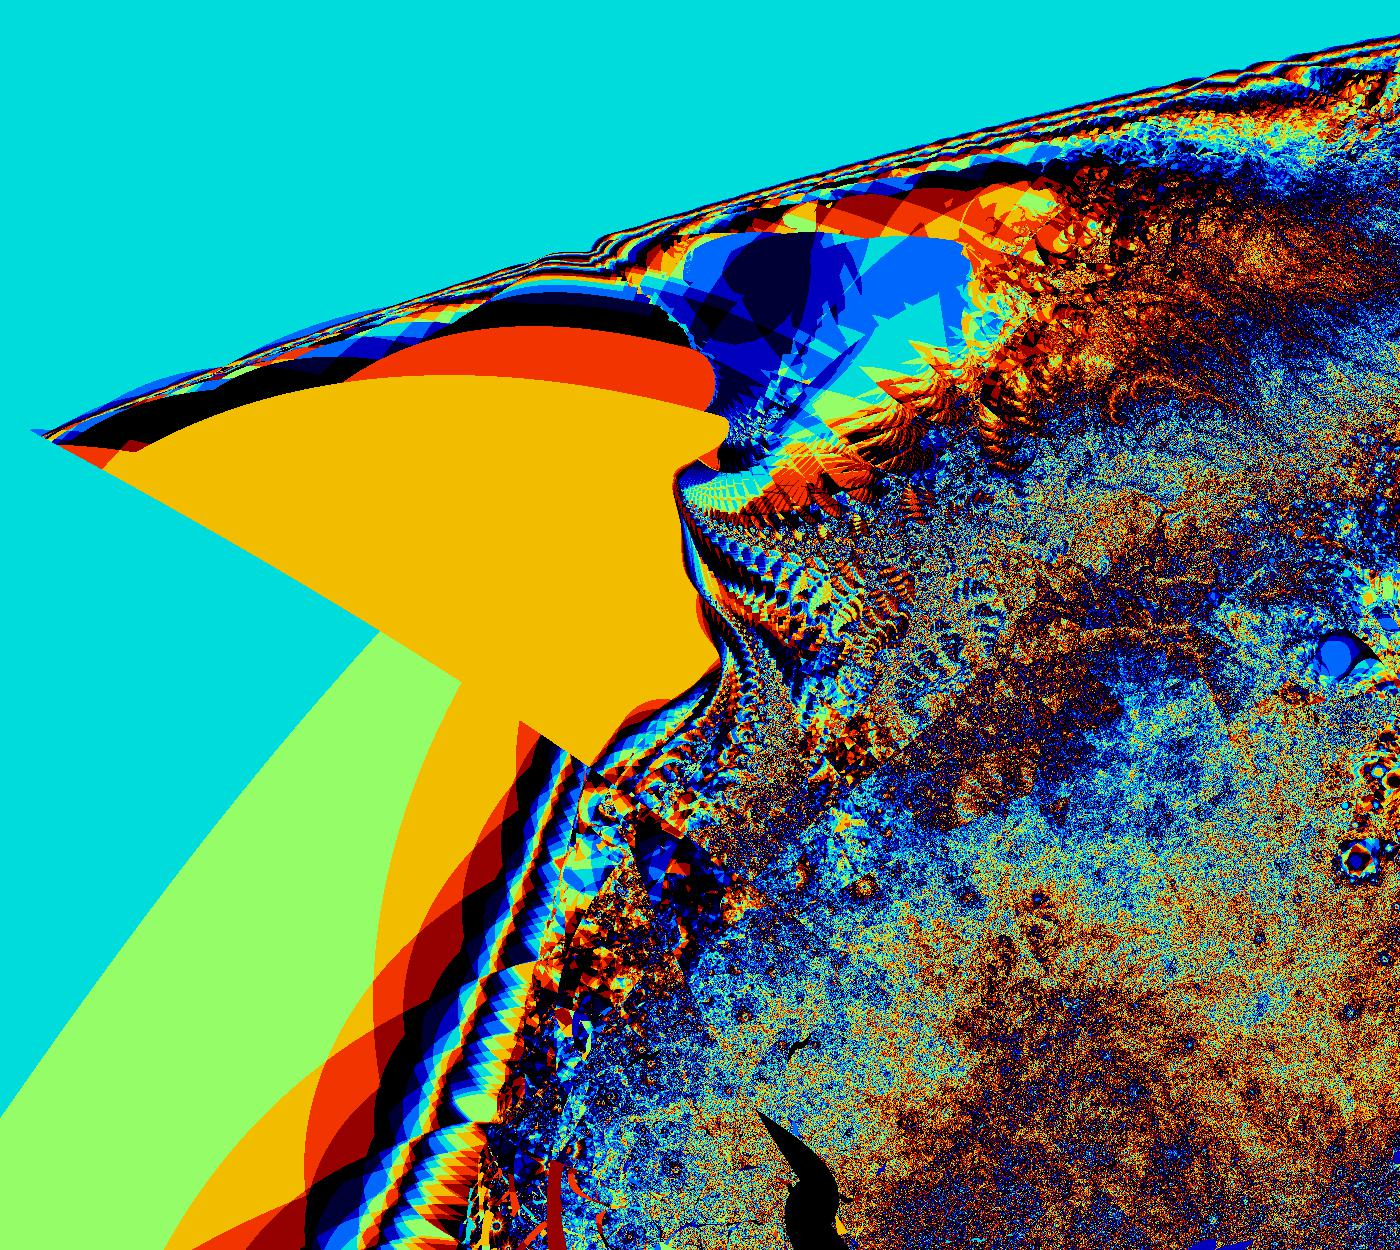

In [26]:
for i in range(100): 
    step.run()
a = ns.eval()
a = 2*np.pi*a/np.max(np.sqrt(a))
DisplayFractal(np.transpose(a))